In [2]:
import pandas as pd
import numpy as np

df_majorities = pd.read_csv('data/results_majorities.csv')
df_fdm = pd.read_csv('data/results_fdm.csv')
df_baseline = pd.read_csv('data/results_baseline.csv')

In [3]:
### 2 frameworks had errors during data collection; exclude them
# df_majorities = df_majorities[~df_majorities["desc_framework"].isin(["Big Five Personality Traits", "Cognitive Behavioral Theory"])]
# df_fdm = df_fdm[~df_fdm["desc_framework"].isin(["Big Five Personality Traits", "Cognitive Behavioral Theory"])]

In [ ]:
df_poe = pd.concat([
    pd.read_csv(f'data/results_poe_{d}.csv')
    for d in ['commonsenseqa', 'socialqa', 'socialsupport', 'strategyqa']
])
df_experts = df_poe[df_poe["expert_id"].astype(str) != "-3"]

## expert count 
# df_expert_counts = df_experts.groupby(["dataset", "model", "desc_framework"])["expert_id"].nunique().reset_index()
# df_expert_counts.rename(columns={"expert_id": "expert_count"}, inplace=True)

# df_fdm = df_fdm.merge(df_expert_counts, on=["dataset", "model", "desc_framework"], how="left")
# df_majorities = df_majorities.merge(df_expert_counts, on=["dataset", "model", "desc_framework"], how="left")

/tmp/ipykernel_66196/2097552999.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_poe = pd.read_csv("data/results_poe.csv")


In [5]:
df_baseline["match"] = (
        df_baseline["final_answer_norm"].astype(str)
         == df_baseline["golden_answer_norm"].astype(str)
    )

df_fdm["match"] = (
        df_fdm["final_answer_norm"].astype(str)
         == df_fdm["golden_answer_norm"].astype(str)
    )

df_majorities["match"] = (
        df_majorities["majority_rand"].astype(str)
         == df_majorities["golden_answer_norm"].astype(str)
    )

## expert vs fdm vs mv

In [6]:
# MV

target_datasets = df_majorities.dataset.unique().tolist()

ranking_df = df_majorities[df_majorities["dataset"].isin(target_datasets)]

# Targets for ranking

for dataset in target_datasets:
    print(f"Dataset: {dataset}")
    ranking_df = df_majorities[df_majorities["dataset"] == dataset]
    print(ranking_df.groupby("desc_framework")["match"].mean().sort_values(ascending=False))

Dataset: CommonsenseQA
desc_framework
Flow Theory                        0.811111
Mental Models                      0.811111
Cognitive Load Theory              0.807778
no-description                     0.806667
Cognitive Behavioral Theory        0.806667
Dual-Process Theory                0.805556
User-Centered Design               0.805556
Social Cognitive Theory            0.802222
Freudian Psychoanalysis            0.802222
Enneagram of Personality Traits    0.801111
Big Five Personality Traits        0.800000
Erikson's Psychosocial Stages      0.800000
no-personality                     0.797778
User Design Persona                0.793333
Myers-Briggs Type Indicator        0.788889
Name: match, dtype: float64
Dataset: SocialQA
desc_framework
User Design Persona                0.761111
Dual-Process Theory                0.752222
Big Five Personality Traits        0.752222
no-description                     0.752222
User-Centered Design               0.751111
Myers-Briggs Type Ind

In [7]:
# FDM

target_datasets = df_fdm.dataset.unique().tolist()

ranking_df = df_fdm[df_fdm["dataset"].isin(target_datasets)]

# Targets for ranking

for dataset in target_datasets:
    print(f"Dataset: {dataset}")
    ranking_df = df_fdm[df_fdm["dataset"] == dataset]
    print(ranking_df.groupby("desc_framework")["match"].mean().sort_values(ascending=False))

Dataset: CommonsenseQA
desc_framework
Cognitive Behavioral Theory        0.821111
no-description                     0.816667
Flow Theory                        0.813333
Mental Models                      0.813333
Cognitive Load Theory              0.810000
Big Five Personality Traits        0.808889
Freudian Psychoanalysis            0.806667
Erikson's Psychosocial Stages      0.804444
User Design Persona                0.803333
Enneagram of Personality Traits    0.802222
no-personality                     0.800000
Dual-Process Theory                0.798889
User-Centered Design               0.796667
Myers-Briggs Type Indicator        0.795556
Social Cognitive Theory            0.794444
Name: match, dtype: float64
Dataset: SocialQA
desc_framework
Myers-Briggs Type Indicator        0.752222
User Design Persona                0.751111
Big Five Personality Traits        0.748889
Flow Theory                        0.748889
User-Centered Design               0.748889
Dual-Process Theory  

In [8]:
# Experts

target_datasets = df_experts.dataset.unique().tolist()
df_experts["match"] = df_experts["final_answer_norm"].astype(str) == df_experts["golden_answer_norm"].astype(str)


ranking_df = df_experts[df_experts["dataset"].isin(target_datasets)]

# Targets for ranking

for dataset in target_datasets:
    print(f"Dataset: {dataset}")
    ranking_df = df_experts[df_experts["dataset"] == dataset]
    print(ranking_df.groupby("desc_framework")["match"].mean().sort_values(ascending=False))


/tmp/ipykernel_66196/1300799794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experts["match"] = df_experts["final_answer_norm"].astype(str) == df_experts["golden_answer_norm"].astype(str)


Dataset: CommonsenseQA
desc_framework
Dual-Process Theory                0.819737
Social Cognitive Theory            0.806220
Erikson's Psychosocial Stages      0.800508
Big Five Personality Traits        0.792381
no-personality                     0.788989
Mental Models                      0.788154
User Design Persona                0.782113
Cognitive Behavioral Theory        0.780417
no-description                     0.779241
User-Centered Design               0.778028
Myers-Briggs Type Indicator        0.771569
Freudian Psychoanalysis            0.771471
Cognitive Load Theory              0.769722
Enneagram of Personality Traits    0.768696
Flow Theory                        0.762576
Name: match, dtype: float64
Dataset: SocialQA
desc_framework
User Design Persona                0.732911
no-description                     0.728557
Dual-Process Theory                0.726548
Big Five Personality Traits        0.720190
Cognitive Load Theory              0.719187
User-Centered Design 

/tmp/ipykernel_66196/2898872897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experts['match'] = df_experts['final_answer_norm'].astype(str) == df_experts['golden_answer_norm'].astype(str)


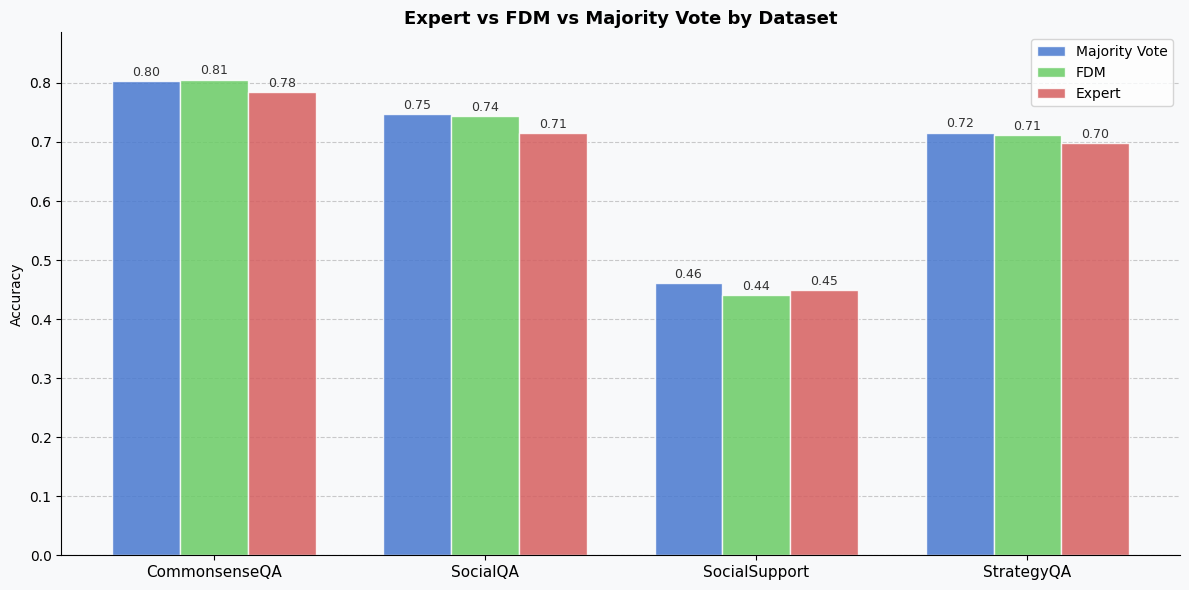

In [10]:
# Build unified dataframe
dfs = []

for dataset in df_majorities['dataset'].unique():
    sub = df_majorities[df_majorities['dataset'] == dataset]
    dfs.append({'dataset': dataset, 'accuracy': sub['match'].mean(), 'method': 'Majority Vote'})

for dataset in df_fdm['dataset'].unique():
    sub = df_fdm[df_fdm['dataset'] == dataset]
    dfs.append({'dataset': dataset, 'accuracy': sub['match'].mean(), 'method': 'FDM'})

df_experts['match'] = df_experts['final_answer_norm'].astype(str) == df_experts['golden_answer_norm'].astype(str)
for dataset in df_experts['dataset'].unique():
    sub = df_experts[df_experts['dataset'] == dataset]
    dfs.append({'dataset': dataset, 'accuracy': sub['match'].mean(), 'method': 'Expert'})

df_combined = pd.DataFrame(dfs)

# Plot
methods = ['Majority Vote', 'FDM', 'Expert']
method_colors = {'Majority Vote': '#4878cf', 'FDM': '#6acc65', 'Expert': '#d65f5f'}
datasets = df_combined['dataset'].unique()

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#f8f9fa')

x = np.arange(len(datasets))
width = 0.25

for i, method in enumerate(methods):
    df_m = df_combined[df_combined['method'] == method].set_index('dataset')
    vals = [df_m['accuracy'].get(ds, np.nan) for ds in datasets]
    offset = (i - 1) * width
    bars = ax.bar(x + offset, vals, width, label=method,
                  color=method_colors[method], alpha=0.85, edgecolor='white')
    for bar, val in zip(bars, vals):
        if not np.isnan(val):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.004,
                    f'{val:.2f}', ha='center', va='bottom', fontsize=9, color='#333')

ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=11)
ax.set_ylabel('Accuracy')
ax.set_ylim(0, df_combined['accuracy'].max() + 0.08)
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4, color='gray')
ax.set_axisbelow(True)
ax.legend(fontsize=10)

plt.title('Expert vs FDM vs Majority Vote by Dataset', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Core RQ Analysis

This code perform cochran's Q method to see if there are significant differences among frameworks

In [64]:
import pandas as pd
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar, cochrans_q
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load data
# -----------------------------
df_majorities = pd.read_csv('data/results_majorities.csv')
df_fdm = pd.read_csv('data/results_fdm.csv')
df_baseline = pd.read_csv('data/results_baseline.csv')

# -----------------------------
# 2. Compute correctness
# -----------------------------
def add_match(df, answer_col):
    df['match'] = (df[answer_col].astype(str) == df['golden_answer_norm'].astype(str))
    df['is_correct'] = df['match'].astype(int)
    # Create unique question id
    df['question_id'] = df['dataset'] + "_" + df['query_idx'].astype(str)
    return df

df_majorities = add_match(df_majorities, 'majority_rand')
df_fdm = add_match(df_fdm, 'final_answer_norm')
df_baseline = add_match(df_baseline, 'final_answer_norm')

# -----------------------------
# 3. Select fixed strategy
# -----------------------------
# Choose either FDM or MV (here FDM as example)
#df_fdm = df_fdm[df_fdm["model"] !="gemma-3-4b-it"]
#df_fdm = df_fdm[df_fdm["model"] !="llama-3.2-3b-instruct"]
df_strategy = df_fdm.copy()

# -----------------------------
# STEP 1: GLOBAL COCHRAN'S Q TEST
# -----------------------------
print("=" * 60)
print("STEP 1: GLOBAL COCHRAN'S Q TEST")
print("=" * 60)

df_pivot_global = df_strategy.pivot_table(
    index=['dataset', 'model', 'question_id'],
    columns='desc_framework',
    values='is_correct'
).dropna()

cq_global = cochrans_q(df_pivot_global.values)
print(f"Global Test (N={len(df_pivot_global)}): Q={cq_global.statistic:.2f}, p={cq_global.pvalue:.4f}")

if cq_global.pvalue >= 0.05:
    print("\nGlobal test not significant. Subset analyses below are EXPLORATORY.")

# -----------------------------
# STEP 2: SUBSET ANALYSES
# -----------------------------
print("\n" + "=" * 60)
print("STEP 2: SUBSET ANALYSES")
print("=" * 60)

# --- Per Dataset ---
print("\n--- Cochran's Q per Dataset ---")
results_dataset = []
for dataset_name in df_strategy['dataset'].unique():
    df_subset = df_strategy[df_strategy['dataset'] == dataset_name]
    wide = df_subset.pivot_table(
        index=['model', 'question_id'],
        columns='desc_framework',
        values='is_correct'
    ).dropna()
    
    if not wide.empty and wide.shape[1] > 1:
        res = cochrans_q(wide.values)
        results_dataset.append({
            'Dataset': dataset_name,
            'N': len(wide),
            'Q': res.statistic,
            'p': res.pvalue
        })

df_res_ds = pd.DataFrame(results_dataset)
if not df_res_ds.empty:
    reject, p_corr, _, _ = multipletests(df_res_ds['p'], method='holm')
    df_res_ds['p_corrected'] = p_corr
    df_res_ds['Sig_raw'] = df_res_ds['p'] < 0.05
    df_res_ds['Sig_corrected'] = reject
    print(df_res_ds.to_string(index=False))

# --- Per Model ---
print("\n--- Cochran's Q per Model ---")
results_model = []
for model_name in df_strategy['model'].unique():
    df_subset = df_strategy[df_strategy['model'] == model_name]
    wide = df_subset.pivot_table(
        index=['dataset', 'question_id'],
        columns='desc_framework',
        values='is_correct'
    ).dropna()
    
    if not wide.empty and wide.shape[1] > 1:
        res = cochrans_q(wide.values)
        results_model.append({
            'Model': model_name,
            'N': len(wide),
            'Q': res.statistic,
            'p': res.pvalue
        })

df_res_model = pd.DataFrame(results_model)
if not df_res_model.empty:
    reject, p_corr, _, _ = multipletests(df_res_model['p'], method='holm')
    df_res_model['p_corrected'] = p_corr
    df_res_model['Sig_raw'] = df_res_model['p'] < 0.05
    df_res_model['Sig_corrected'] = reject
    print(df_res_model.to_string(index=False))

# --- Per Dataset × Model ---
print("\n--- Cochran's Q per Dataset × Model ---")
results_combo = []
for dataset_name in df_strategy['dataset'].unique():
    for model_name in df_strategy['model'].unique():
        df_subset = df_strategy[
            (df_strategy['dataset'] == dataset_name) & 
            (df_strategy['model'] == model_name)
        ]
        
        wide = df_subset.pivot_table(
            index='question_id',
            columns='desc_framework',
            values='is_correct'
        ).dropna()
        
        if not wide.empty and wide.shape[1] > 1 and len(wide) > 1:
            res = cochrans_q(wide.values)
            results_combo.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'N': len(wide),
                'Q': res.statistic,
                'p': res.pvalue
            })

df_res_combo = pd.DataFrame(results_combo)
if not df_res_combo.empty:
    reject, p_corr, _, _ = multipletests(df_res_combo['p'], method='holm')
    df_res_combo['p_corrected'] = p_corr
    df_res_combo['Sig_raw'] = df_res_combo['p'] < 0.05
    df_res_combo['Sig_corrected'] = reject
    print(df_res_combo.to_string(index=False))
    
    # Summary
    print(f"\nSummary:")
    print(f"  Significant (raw p<0.05): {df_res_combo['Sig_raw'].sum()}/{len(df_res_combo)}")
    print(f"  Significant (Holm corrected): {df_res_combo['Sig_corrected'].sum()}/{len(df_res_combo)}")

STEP 1: GLOBAL COCHRAN'S Q TEST
Global Test (N=3600): Q=18.22, p=0.1970

Global test not significant. Subset analyses below are EXPLORATORY.

STEP 2: SUBSET ANALYSES

--- Cochran's Q per Dataset ---
      Dataset   N         Q        p  p_corrected  Sig_raw  Sig_corrected
CommonsenseQA 900 19.885305 0.133799     0.133799    False          False
     SocialQA 900 31.512656 0.004696     0.014088     True           True
SocialSupport 900 47.027083 0.000019     0.000076     True           True
   StrategyQA 900 26.434783 0.022779     0.045558     True           True

--- Cochran's Q per Model ---
                 Model   N         Q        p  p_corrected  Sig_raw  Sig_corrected
        gemma-3-12b-it 400 13.120558 0.517053     1.000000    False          False
        gemma-3-27b-it 400 12.901389 0.534303     1.000000    False          False
         gemma-3-4b-it 400 36.433260 0.000898     0.008085     True           True
 llama-3.1-8b-instruct 400 11.647489 0.634589     1.000000    False 

## Performance on SocialSupport

In [65]:
print("\n--- SocialSupport: Accuracy by Framework ---")
df_social_support = df_strategy[df_strategy['dataset'] == 'SocialSupport']

acc_by_fw = df_social_support.groupby('desc_framework', observed=True)['is_correct'].agg(['mean', 'std', 'count'])
acc_by_fw = acc_by_fw.sort_values('mean', ascending=False)
acc_by_fw['mean'] = acc_by_fw['mean'].round(4)
acc_by_fw['std'] = acc_by_fw['std'].round(4)
print(acc_by_fw)


--- SocialSupport: Accuracy by Framework ---
                                   mean     std  count
desc_framework                                        
Myers-Briggs Type Indicator      0.4644  0.4990    900
Social Cognitive Theory          0.4567  0.4984    900
no-personality                   0.4511  0.4979    900
User-Centered Design             0.4511  0.4979    900
Erikson's Psychosocial Stages    0.4500  0.4978    900
Cognitive Behavioral Theory      0.4489  0.4977    900
Dual-Process Theory              0.4444  0.4972    900
Flow Theory                      0.4433  0.4971    900
Mental Models                    0.4422  0.4969    900
Freudian Psychoanalysis          0.4411  0.4968    900
Enneagram of Personality Traits  0.4356  0.4961    900
Cognitive Load Theory            0.4311  0.4955    900
User Design Persona              0.4300  0.4954    900
Big Five Personality Traits      0.4200  0.4938    900
no-description                   0.3978  0.4897    900


## Framework effect by dataset

desc_framework
Social Cognitive Theory            0.794444
Myers-Briggs Type Indicator        0.795556
User-Centered Design               0.796667
Dual-Process Theory                0.798889
no-personality                     0.800000
Enneagram of Personality Traits    0.802222
User Design Persona                0.803333
Erikson's Psychosocial Stages      0.804444
Freudian Psychoanalysis            0.806667
Big Five Personality Traits        0.808889
Cognitive Load Theory              0.810000
Flow Theory                        0.813333
Mental Models                      0.813333
no-description                     0.816667
Cognitive Behavioral Theory        0.821111
Name: is_correct, dtype: float64
desc_framework
Freudian Psychoanalysis            0.715556
Erikson's Psychosocial Stages      0.727778
Mental Models                      0.740000
Enneagram of Personality Traits    0.741111
no-description                     0.741111
Cognitive Behavioral Theory        0.744444
Social Cognit

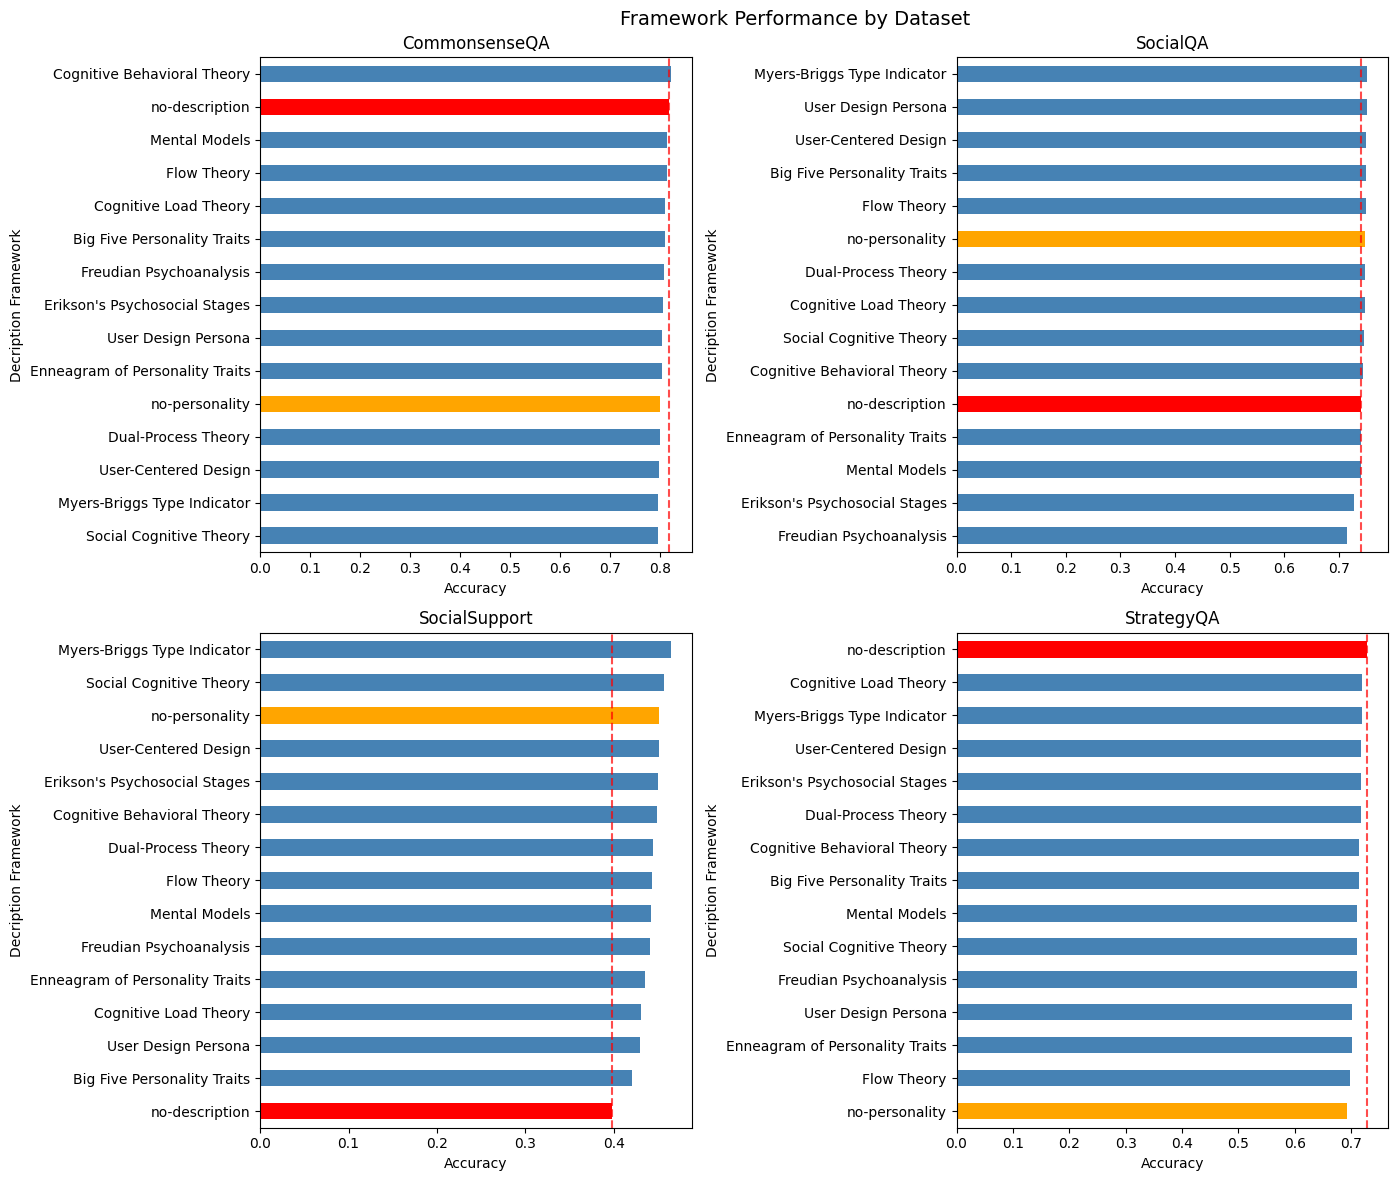

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

def bar_color(fw):
    if fw == 'no-description':
        return 'red'
    elif fw == 'no-personality':
        return 'orange'
    else:
        return 'steelblue'


for idx, dataset in enumerate(df_strategy['dataset'].unique()):
    ax = axes[idx // 2, idx % 2]
    df_ds = df_strategy[df_strategy['dataset'] == dataset]
    
    acc = df_ds.groupby('desc_framework', observed=True)['is_correct'].mean().sort_values()
    print(acc)
    baseline_val = df_ds[df_ds['desc_framework'] == 'no-description']['is_correct'].mean()
    colors = [bar_color(fw) for fw in acc.index]


    
    acc.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Decription Framework')
    ax.axvline(baseline_val, color='red', linestyle='--', alpha=0.7, label='Baseline')

plt.suptitle('Framework Performance by Dataset', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()

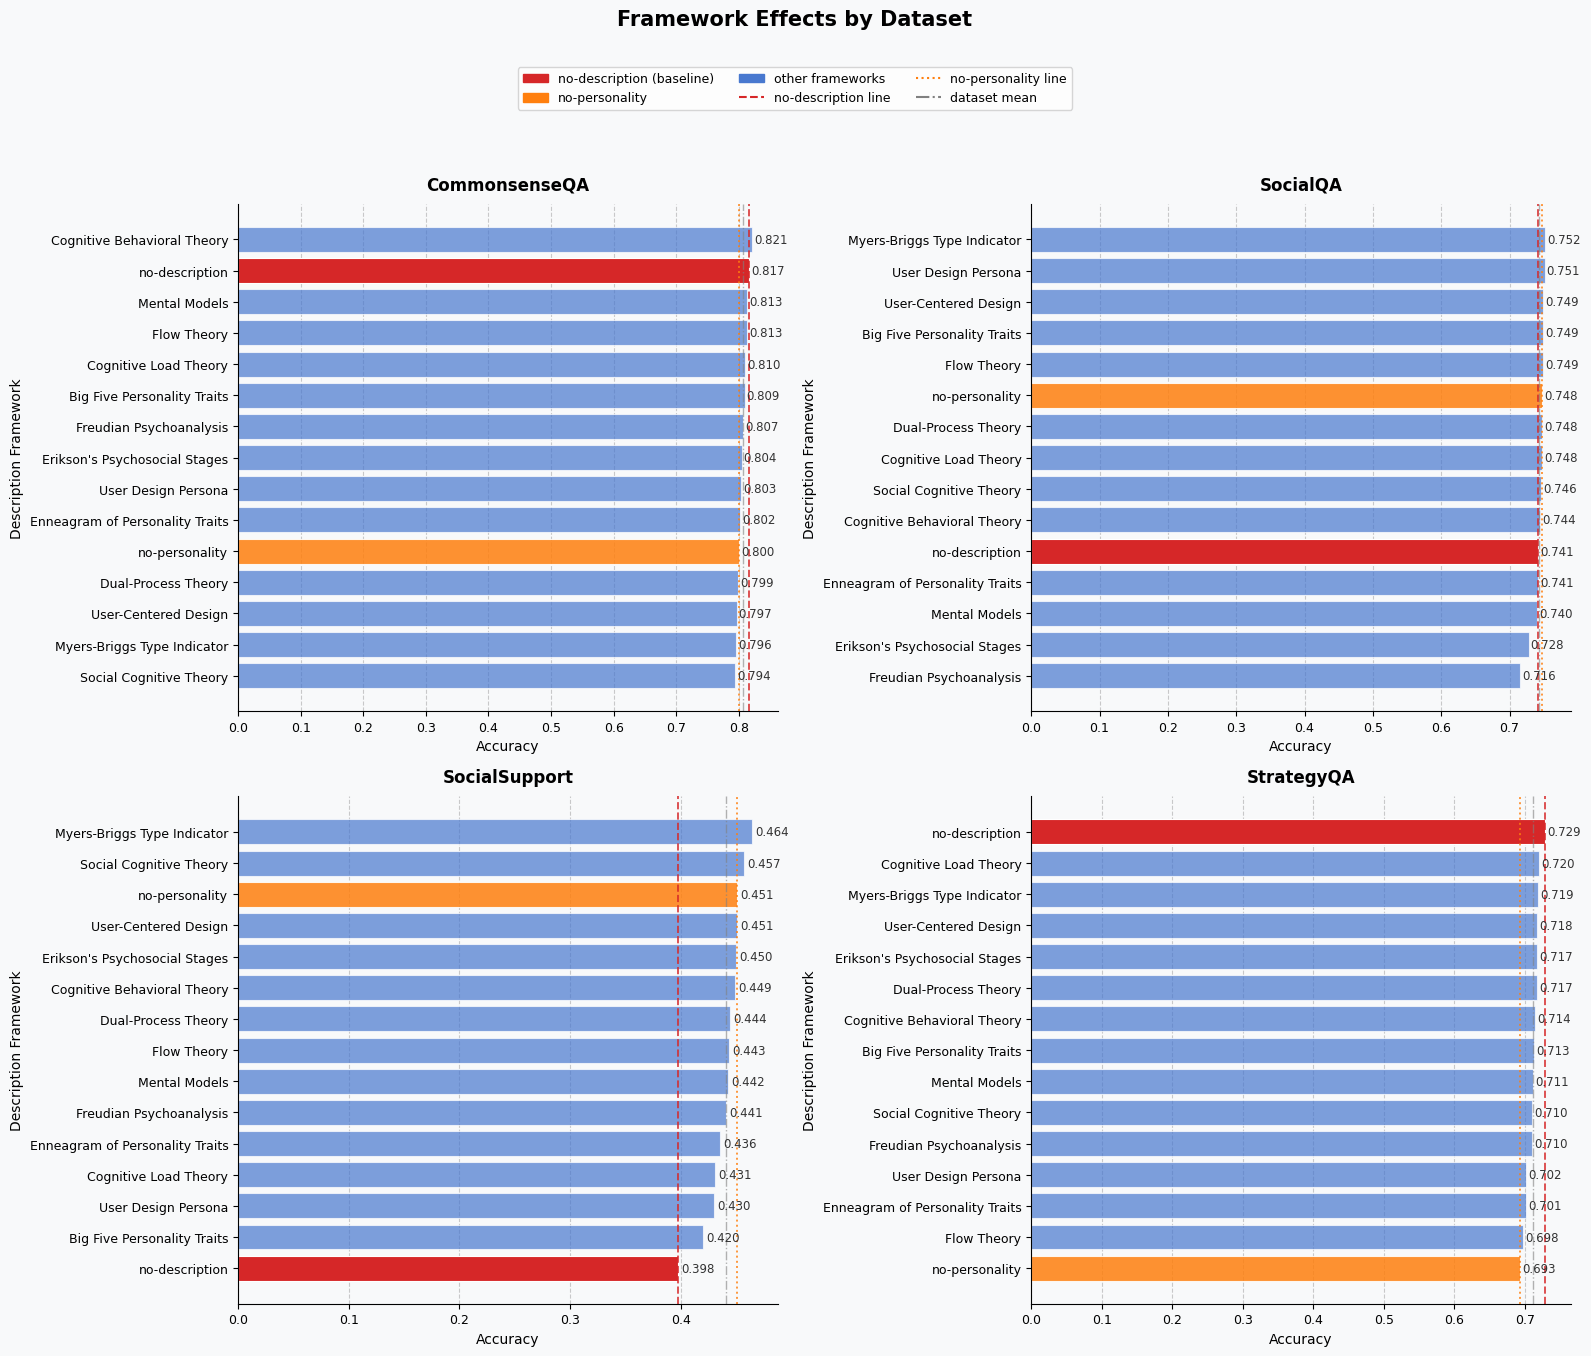

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(16, 13))
fig.patch.set_facecolor('#f8f9fa')


COLORS = {
    'no-description': '#d62728',   # strong red
    'no-personality': '#ff7f0e',   # orange
    'default':        '#4878cf',   # muted blue
}
ALPHA = {
    'no-description': 1.0,
    'no-personality': 0.85,
    'default':        0.7,
}

def bar_color(fw):
    return COLORS.get(fw, COLORS['default'])

def bar_alpha(fw):
    return ALPHA.get(fw, ALPHA['default'])

for idx, dataset in enumerate(df_strategy['dataset'].unique()):
    ax = axes[idx // 2, idx % 2]
    ax.set_facecolor('#f8f9fa')

    df_ds = df_strategy[df_strategy['dataset'] == dataset]
    acc = df_ds.groupby('desc_framework', observed=True)['is_correct'].mean().sort_values()

    baseline_val     = acc.get('no-description', None)
    no_pers_val      = acc.get('no-personality', None)
    overall_mean     = acc.mean()

    colors = [bar_color(fw) for fw in acc.index]
    alphas = [bar_alpha(fw) for fw in acc.index]

    bars = ax.barh(acc.index, acc.values, color=colors, alpha=1.0, edgecolor='white', linewidth=0.8)

    # Apply per-bar alpha manually
    for bar, a in zip(bars, alphas):
        bar.set_alpha(a)

    # Value labels at end of each bar
    for bar, val in zip(bars, acc.values):
        ax.text(val + 0.003, bar.get_y() + bar.get_height() / 2,
                f'{val:.3f}', va='center', ha='left', fontsize=8.5, color='#333')

    # Reference lines
    if baseline_val is not None:
        ax.axvline(baseline_val, color=COLORS['no-description'], linestyle='--',
                   linewidth=1.4, alpha=0.8, label='no-description')
    if no_pers_val is not None:
        ax.axvline(no_pers_val, color=COLORS['no-personality'], linestyle=':',
                   linewidth=1.4, alpha=0.8, label='no-personality')
    ax.axvline(overall_mean, color='gray', linestyle='-.',
               linewidth=1.0, alpha=0.6, label='dataset mean')

    ax.set_title(dataset, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Accuracy', fontsize=10)
    ax.set_ylabel('Description Framework', fontsize=10)
    ax.tick_params(labelsize=9)
    ax.spines[['top', 'right']].set_visible(False)

    # Subtle x-grid only
    ax.xaxis.grid(True, linestyle='--', alpha=0.4, color='gray')
    ax.set_axisbelow(True)

# Shared legend
legend_handles = [
    mpatches.Patch(color=COLORS['no-description'], label='no-description (baseline)'),
    mpatches.Patch(color=COLORS['no-personality'], label='no-personality'),
    mpatches.Patch(color=COLORS['default'],        label='other frameworks'),
    plt.Line2D([0], [0], color=COLORS['no-description'], linestyle='--', label='no-description line'),
    plt.Line2D([0], [0], color=COLORS['no-personality'], linestyle=':',  label='no-personality line'),
    plt.Line2D([0], [0], color='gray',                   linestyle='-.', label='dataset mean'),
]
plt.suptitle('Framework Effects by Dataset', fontsize=15, fontweight='bold', y=1.04)
fig.legend(handles=legend_handles, loc='upper center', ncol=3,
           fontsize=9, frameon=True, bbox_to_anchor=(0.5, 1.0))
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [68]:
effect_summary = []
for dataset in df_strategy['dataset'].unique():
    df_ds = df_strategy[df_strategy['dataset'] == dataset]
    
    baseline_acc = df_ds[df_ds['desc_framework'] == 'no-description']['is_correct'].mean()
    
    acc_by_fw = df_ds.groupby('desc_framework', observed=True)['is_correct'].mean()
    best_fw = acc_by_fw.drop('no-description').idxmax()
    worst_fw = acc_by_fw.drop('no-description').idxmin()
    
    effect_summary.append({
        'Dataset': dataset,
        'Baseline (no-desc)': baseline_acc,
        'Best Framework': best_fw,
        'Best Accuracy': acc_by_fw[best_fw],
        'Improvement': acc_by_fw[best_fw] - baseline_acc,
        'Worst Framework': worst_fw,
        'Worst Accuracy': acc_by_fw[worst_fw],
        'Decrease': acc_by_fw[worst_fw] - baseline_acc
    })

df_effect_summary = pd.DataFrame(effect_summary)
df_effect_summary = df_effect_summary.round(4)
print(df_effect_summary.to_string(index=False))

      Dataset  Baseline (no-desc)              Best Framework  Best Accuracy  Improvement             Worst Framework  Worst Accuracy  Decrease
CommonsenseQA              0.8167 Cognitive Behavioral Theory         0.8211       0.0044     Social Cognitive Theory          0.7944   -0.0222
     SocialQA              0.7411 Myers-Briggs Type Indicator         0.7522       0.0111     Freudian Psychoanalysis          0.7156   -0.0256
SocialSupport              0.3978 Myers-Briggs Type Indicator         0.4644       0.0667 Big Five Personality Traits          0.4200    0.0222
   StrategyQA              0.7289       Cognitive Load Theory         0.7200      -0.0089              no-personality          0.6933   -0.0356


## Model × Dataset showing framework sensitivity


--- Framework Sensitivity by Model × Dataset ---


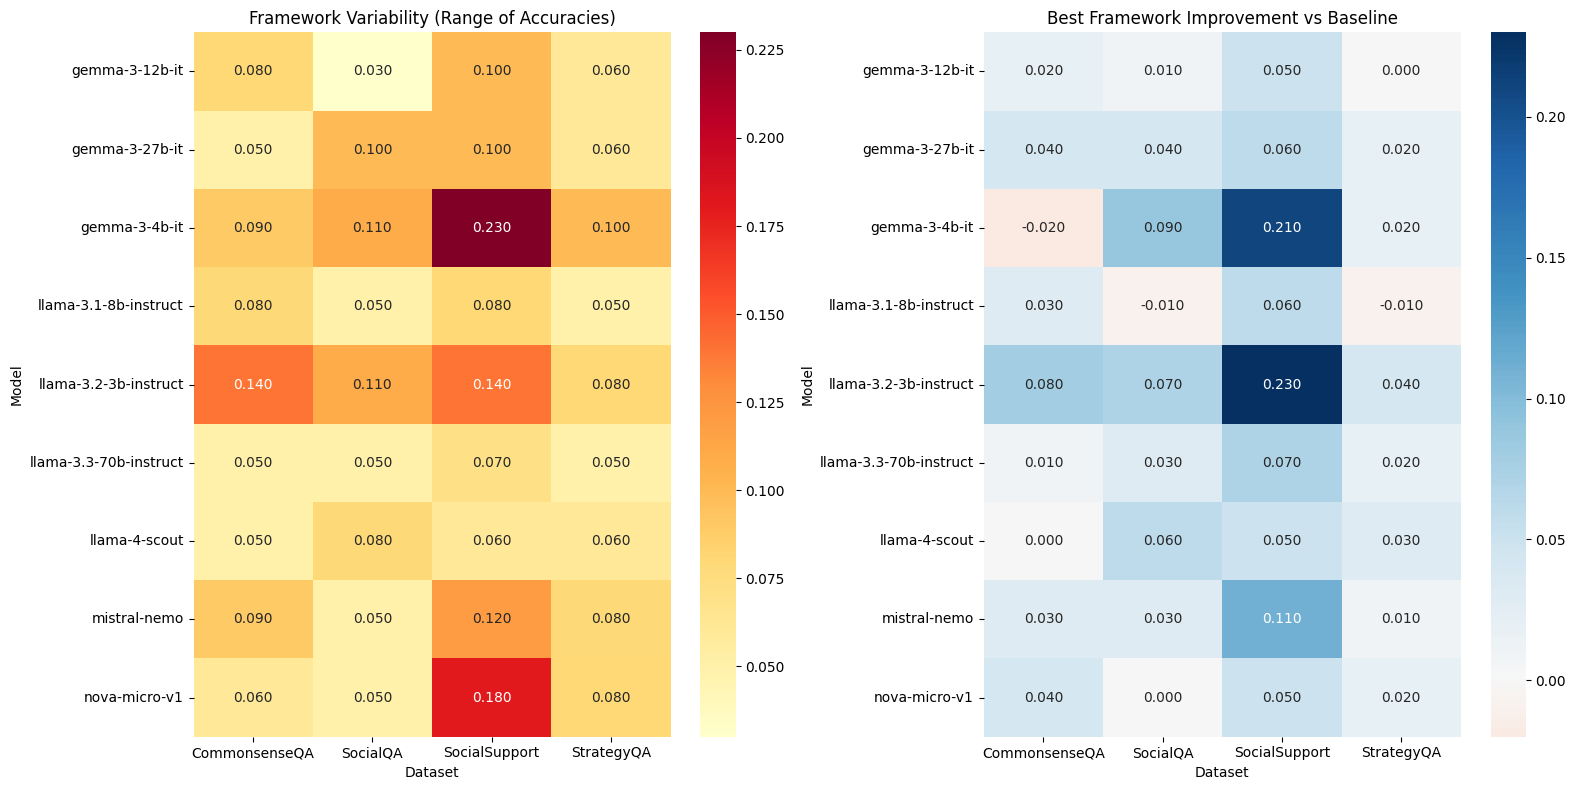

In [62]:
print("\n--- Framework Sensitivity by Model × Dataset ---")

sensitivity = []
for model in df_strategy['model'].unique():
    for dataset in df_strategy['dataset'].unique():
        df_sub = df_strategy[(df_strategy['model'] == model) & (df_strategy['dataset'] == dataset)]
        
        acc_by_fw = df_sub.groupby('desc_framework', observed=True)['is_correct'].mean()
        baseline = acc_by_fw.get('no-description', np.nan)
        
        # Calculate range and mean effect
        fw_accs = acc_by_fw.drop('no-description', errors='ignore')
        sensitivity.append({
            'Model': model,
            'Dataset': dataset,
            'Baseline': baseline,
            'Max_Effect': fw_accs.max() - baseline if not np.isnan(baseline) else np.nan,
            'Min_Effect': fw_accs.min() - baseline if not np.isnan(baseline) else np.nan,
            'Range': fw_accs.max() - fw_accs.min(),
            'Mean_Effect': fw_accs.mean() - baseline if not np.isnan(baseline) else np.nan
        })

df_sensitivity = pd.DataFrame(sensitivity)

# Pivot for heatmap
pivot_range = df_sensitivity.pivot(index='Model', columns='Dataset', values='Range')
pivot_max = df_sensitivity.pivot(index='Model', columns='Dataset', values='Max_Effect')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Range heatmap (how much frameworks vary)
sns.heatmap(pivot_range, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Framework Variability (Range of Accuracies)')

# Max improvement heatmap
sns.heatmap(pivot_max, annot=True, fmt='.3f', cmap='RdBu', center=0, ax=axes[1])
axes[1].set_title('Best Framework Improvement vs Baseline')

plt.tight_layout()
plt.show()

In [63]:
# -----------------------------
# Post-hoc McNemar tests for significant subsets
# -----------------------------
print("\n" + "=" * 60)
print("POST-HOC MCNEMAR TESTS (vs no-description baseline)")
print("=" * 60)

def run_posthoc_mcnemar(df_subset, subset_name, index_cols='question_id'):
    """Run McNemar tests comparing each framework to no-description baseline"""
    if isinstance(index_cols, str):
        index_cols = [index_cols]
    
    wide = df_subset.pivot_table(
        index=index_cols,
        columns='desc_framework',
        values='is_correct'
    ).dropna()
    
    if 'no-description' not in wide.columns:
        print(f"{subset_name}: No baseline column found")
        return None
    
    baseline_col = wide['no-description']
    frameworks = [f for f in wide.columns if f != 'no-description']
    
    results = []
    for fw in frameworks:
        ct = pd.crosstab(wide[fw], baseline_col)
        try:
            res = mcnemar(ct, exact=True)
            results.append({
                'Framework': fw,
                'p_value': res.pvalue,
                'Accuracy_FW': wide[fw].mean(),
                'Accuracy_Baseline': baseline_col.mean(),
                'Diff': wide[fw].mean() - baseline_col.mean()
            })
        except:
            pass
    
    if not results:
        return None
    
    df_res = pd.DataFrame(results)
    reject, p_corr, _, _ = multipletests(df_res['p_value'], method='holm')
    df_res['p_corrected'] = p_corr
    df_res['Sig'] = reject
    df_res = df_res.sort_values('Diff', ascending=False)
    
    print(f"\n{subset_name}:")
    sig_results = df_res[df_res['Sig']]
    if len(sig_results) > 0:
        print("Significant frameworks (after Holm correction):")
        print(sig_results[['Framework', 'Diff', 'p_corrected']].to_string(index=False))
    else:
        print("No significant pairwise differences after correction")
    
    # Show top 3 anyway
    print("\nTop 3 frameworks by effect:")
    print(df_res.head(3)[['Framework', 'Diff', 'p_value', 'p_corrected']].to_string(index=False))
    
    return df_res

# Run for significant datasets
for ds in ['SocialSupport', 'SocialQA', 'StrategyQA']:
    df_sub = df_strategy[df_strategy['dataset'] == ds]
    run_posthoc_mcnemar(df_sub, f"Dataset: {ds}", index_cols=['model', 'question_id'])

# Run for significant model
df_sub = df_strategy[df_strategy['model'] == 'gemma-3-4b-it']
run_posthoc_mcnemar(df_sub, "Model: gemma-3-4b-it", index_cols=['dataset', 'question_id'])


POST-HOC MCNEMAR TESTS (vs no-description baseline)

Dataset: SocialSupport:
Significant frameworks (after Holm correction):
                      Framework     Diff  p_corrected
    Myers-Briggs Type Indicator 0.066667     0.000004
        Social Cognitive Theory 0.058889     0.000123
                 no-personality 0.053333     0.000429
           User-Centered Design 0.053333     0.000672
  Erikson's Psychosocial Stages 0.052222     0.001314
    Cognitive Behavioral Theory 0.051111     0.001936
            Dual-Process Theory 0.046667     0.003525
                    Flow Theory 0.045556     0.005437
                  Mental Models 0.044444     0.004419
        Freudian Psychoanalysis 0.043333     0.008783
Enneagram of Personality Traits 0.037778     0.021720
          Cognitive Load Theory 0.033333     0.044618
            User Design Persona 0.032222     0.044618

Top 3 frameworks by effect:
                  Framework     Diff      p_value  p_corrected
Myers-Briggs Type Indicato

,Framework,p_value,Accuracy_FW,Accuracy_Baseline,Diff,p_corrected,Sig
1,Cognitive Behavioral Theory,0.010338,0.6425,0.5875,0.0550,0.144727,False
2,Cognitive Load Theory,0.014454,0.6350,0.5875,0.0475,0.187900,False
8,Mental Models,0.042957,0.6300,0.5875,0.0425,0.515479,False
3,Dual-Process Theory,0.067445,0.6250,0.5875,0.0375,0.741891,False
6,Flow Theory,0.086437,0.6250,0.5875,0.0375,0.777935,False
12,User-Centered Design,0.067445,0.6250,0.5875,0.0375,0.741891,False
10,Social Cognitive Theory,0.103422,0.6225,0.5875,0.0350,0.827375,False
9,Myers-Briggs Type Indicator,0.241645,0.6150,0.5875,0.0275,1.000000,False
13,no-personality,0.305677,0.6100,0.5875,0.0225,1.000000,False
5,Erikson's Psychosocial Stages,0.550413,0.6025,0.5875,0.0150,1.000000,False
